   Plant  Soil Voltage (V)  Meter Reading             Notes
0      1            1.2359              8  Recently watered
1      2            1.4804              7  Recently watered
2      3            1.9839              2         Looks dry
3      4            1.5308              8               NaN
4      5            1.6720              5               NaN
   Plant  Soil Voltage (V)  Meter Reading                           Notes Category
0      1            1.2359              8                Recently watered      WET
1      2            1.4804              7                Recently watered    MOIST
2      3            1.9839              2                       Looks dry      DRY
3      4            1.5308              8                             NaN      WET
4      5            1.6720              5                             NaN    MOIST
5      6            1.9635              3  Meter hovering between 3 and 4      DRY
6      7            2.3250              1                  

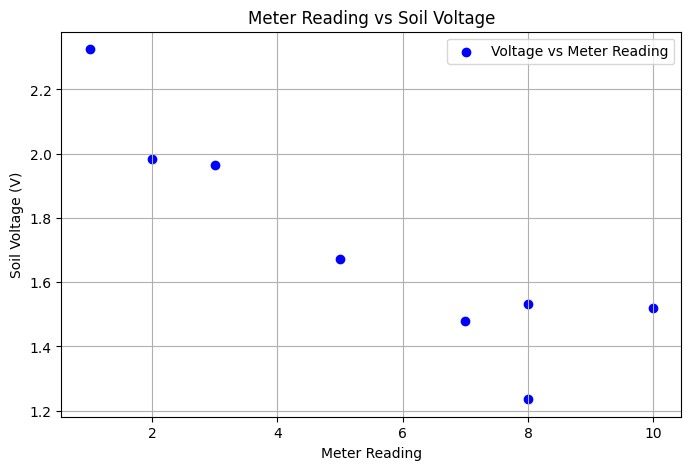

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plant_df = pd.read_csv('./plant_data.csv')
print(plant_df.head())
plant_df['Category'] = pd.cut(plant_df["Meter Reading"], bins=[0, 3, 7, 10], labels=["DRY", "MOIST", "WET"], right=True)
print(plant_df.to_string())

# graph
# Create a line graph
plt.figure(figsize=(8, 5))
plt.scatter(plant_df['Meter Reading'], plant_df['Soil Voltage (V)'],color='b', marker='o', label='Voltage vs Meter Reading')

# label
plt.title('Meter Reading vs Soil Voltage')
plt.xlabel('Meter Reading')
plt.ylabel('Soil Voltage (V)')
plt.grid(True)
plt.legend()

plt.show()

Mean Squared Error: 0.33
Mean Absolute Error: 0.58
R² score: 0.92
Intercept: 19.849450205761407
Coefficients: [-8.28772485]


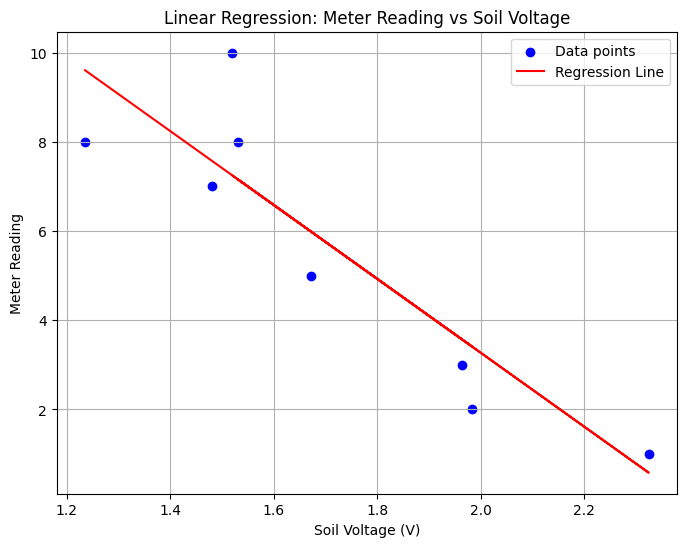

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = plant_df[['Soil Voltage (V)']]
y = plant_df['Meter Reading']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# print(X_test)
# print(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict Voltage
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² score: {r2:.2f}')
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# Plotting: Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Soil Voltage (V)')
plt.ylabel('Meter Reading')
plt.title('Linear Regression: Meter Reading vs Soil Voltage')
plt.legend()
plt.grid(True)
plt.show()